# 유튜브 댓글 분석 및 시각화

## 1.데이터 준비하기

In [ ]:
!pip install koreanize-matplotlib
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.6/496.6 kB 35.4 MB/s eta 0:00:00


In [ ]:

import pandas as pd
import numpy as np
import konlpy

import matplotlib.pyplot as plt
import plotly.express as px
import koreanize_matplotlib

from PIL import Image
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator


In [ ]:
youtube_df=pd.read_csv('/content/해리포터 댓글 수집_20250708.csv')
youtube_df.head()

,댓글내용
0,대단한건 해리포터 1도 모르는 사람도 이 영상보면 스토리라인 이해는 할 수 있을듯ㅋ...
1,해리포터 몇년전에 다 봤는데 이거 보니까 진짜 너무 잘 정리한것 같다고 생각했고 진...
2,어떻게 몇십시간 짜리를 8분으로 요약할수 있지...ㄷㄷ
3,개인적으로 저의 최애 부분.. 0:26 해그리드 목소리 .. ㅋㅋ 1:02 덤블도...
4,5:34 이 진중한 장면뒤에 해리 뛰어가는게 너무 종이인형같이 하찮아서 자꾸 웃음터...


## 2.단어분석_okt사용


In [ ]:
okt=konlpy.tag.Okt()

word_df=pd.DataFrame({'word':okt.nouns(' '.join(comment for comment in youtube_df['댓글내용'].astype(str)))})
word_df

,word
0,해리포터
1,도
2,사람
3,이
4,상보
...,...
791,증오
792,눈빛
793,짝사랑
794,증오


In [ ]:

group_df=word_df.groupby('word', as_index=False).agg(n=('word','count')).sort_values('n',ascending=False)
group_df.head()

,word,n
423,해리포터,29
347,진짜,23
284,이,21
268,요약,17
58,노래,14


In [ ]:
px.bar(group_df.head(20),x='word',y='n',text_auto=True)

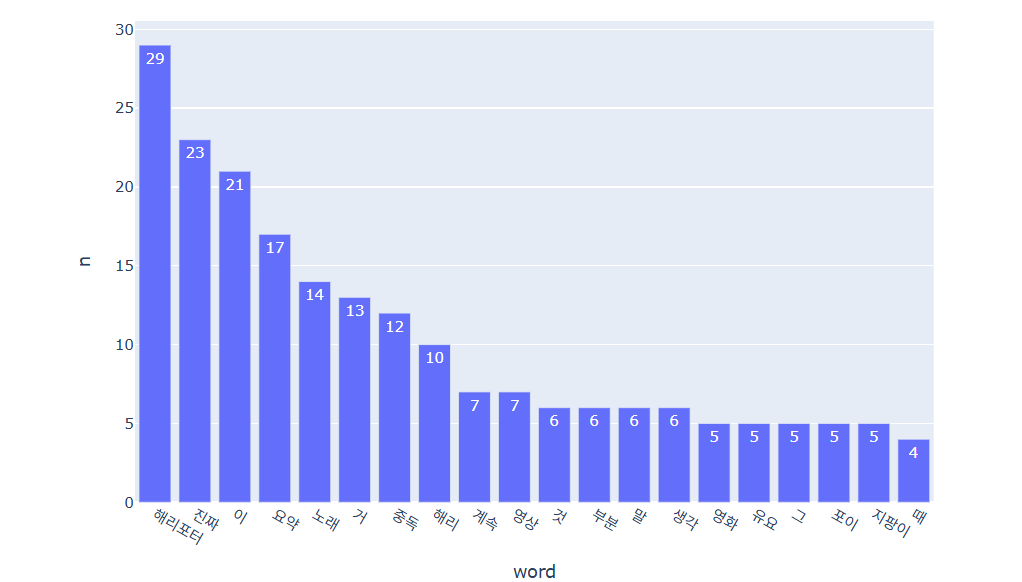

시각화

In [ ]:
text= ' '.join(comment for comment in youtube_df['댓글내용'].astype(str))
text

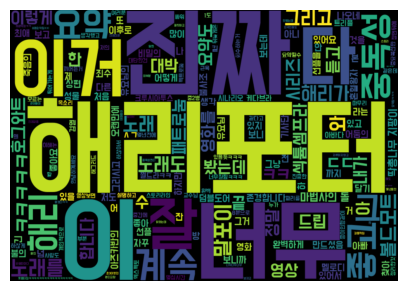

In [ ]:
font_path='/content/BMDOHYEON_ttf.ttf'

plt.subplots(figsize=(5,5))
wc=WordCloud(width=1000,height=700,font_path=font_path).generate(text)
plt.axis('off')
plt.imshow(wc,interpolation='bilinear')
plt.show()

마스킹


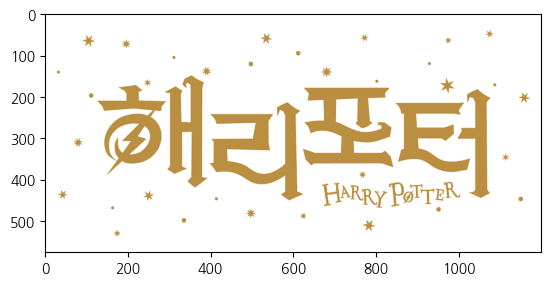

In [ ]:
icon = Image.open('/content/harry.png')
plt.imshow(icon)

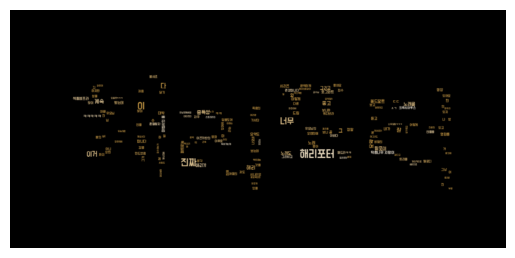

In [ ]:
mask_img=np.array(icon)

wc=WordCloud(width=1000,height=700,
             font_path=font_path,
             mask=mask_img
             ).generate(text)

img_colors=ImageColorGenerator(mask_img)
img_wc = wc.recolor(color_func=img_colors)

plt.axis('off') #눈금제거

#시각화
plt.imshow(wc,interpolation='bilinear')
plt.show()